# Markov Chain Monte Carlo Simulation of an Ideal Gas
---


## 0. Theory


## 1. Newman's MCMC Code
Below is a slightly modified version of Newman's Markov chain Monte Carlo code for an ideal gas. Familiarize yourself with this code, run it, tinker with the parameters and re-run, etc. 

If you like, copy and paste Newman's version of the code. Or use the code here. Or re-type Newman's code yourself. Whatever you decide, just get a working MCMC code using this algorithm and familiarize yourself with it.

For example, the code rejects a move if a particle tries to lower one of its quantum numbers below the ground state value. What part of the code enforces this condition? Try removing the condition and see what the code does instead.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
## set parameters
T = 10.0        #temperature
N = 1000        #number of particles
steps = 250000  #number of Monte Carlo steps

## initialize state array to the ground state
nstate = np.ones([N,3], int)

## initialize total energy tracker
estate = []
E = 3*N * 0.5*np.pi*np.pi
estate = [E]

In [14]:
## mcmc loop
for k in range(steps):
    
    ## select particle
    i = np.random.randint(N)
    
    ## select x,y,z state
    j = np.random.randint(3)
    
    ## choose the move
    if np.random.random() < 0.5:
        dn = 1
        dE = 0.5*np.pi*np.pi*(1 + 2*nstate[i,j])
    else:
        dn = -1
        dE = 0.5*np.pi*np.pi*(1 - 2*nstate[i,j])
    
    ## decide whether to accept the move
    if nstate[i,j] > 1 or dn == 1:
        if np.random.random() < np.exp(-dE/T):
            nstate[i,j] += dn
            E += dE
    
    estate.append(E)

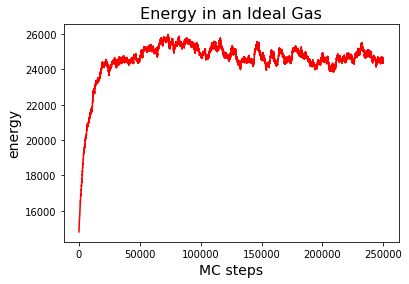

In [15]:
## plot energy vs mcsteps
mcsteps = np.arange(0, steps+1, 1)
plt.plot(mcsteps, estate, 'r-')
plt.xlabel('MC steps', fontsize=14)
plt.ylabel('energy', fontsize=14)
plt.title('Energy in an Ideal Gas', fontsize=16)
plt.show()

## 2. Plot Energy vs. Temperature
To see whether the MCMC simulation agrees with the theory, re-run the code for the following (dimensionless) temperatures: 10, 50, 100, 150, 200, 250, 300. Measure the equilibrium energy for each temperature, and then plot energy versus temperature. Do your results agree with the theory of an ideal gas?

TIPS:
- ideally you do not want to duplicate the above code for each new experiment (temperature). Instead consider wrapping a function around the above code. Then you would only need to call that function with different temperatures. This is much less prone to introducing bugs than duplicating your code many times. Also, it makes your code easier to maintain in the future (e.g., if you decide to change the MCMC code in the future, you only have to make changes in one place inside the function).


- test your function with just one or two temperatures first, before jumping right in to all seven temps.


Other things to consider:

- you need to determine how to calculate the equilibrium temperature. Think about how you would do that. Also decide whether you want to include that in your MCMC code, or keep it outside as a separate routine.


- you need to make sure that your MCMC code has enough time to equilibrate at each temperature. Think about how you would choose the number of MC steps to ensure that. Do you want to handle it manually or automatically?